# Timeseries Momemtum Attacker - Online Approach Notebook

The purpose of this Notebook is to create a model that receives stream data and try to detect some momentum: detect if the data will go up or down in a meaningful way.

## The Problem

Time series such a financial data can exhibit beha

## The Solution

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from endersgame.attackers import UP

def predict_one(x, k):
    return UP

In [3]:
from endersgame.crunch import crunch

HTML(value='\n<style>\n    .table { \n        width: 100%; \n        margin-bottom: 1rem; \n        background…

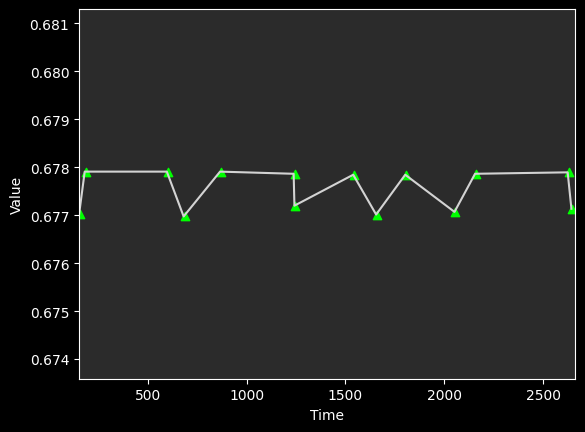

In [8]:
crunch.replay(delay=0.1)

HTML(value='\n<style>\n    .table { \n        width: 100%; \n        margin-bottom: 1rem; \n        background…

Login successful
Stream registered
WebSocket connection started
Connected to stream


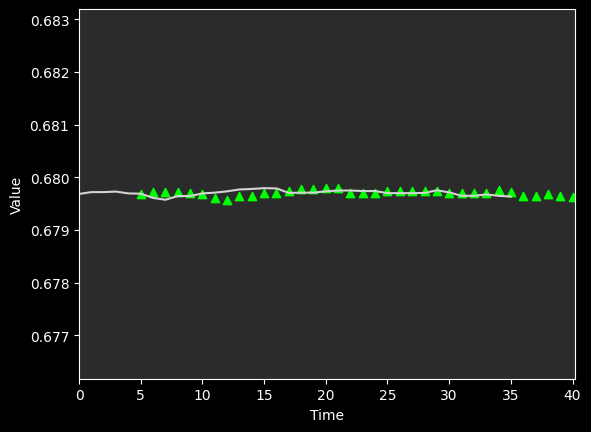

Cell interrupt detected. Stopping...
Live data processing stopped
Connection closed normally.
WebSocket connection is closed


In [5]:
crunch.live()